In [ ]:
!pip install hmm

In [ ]:
!pip install hmmlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 1.9 MB/s eta 0:00:00


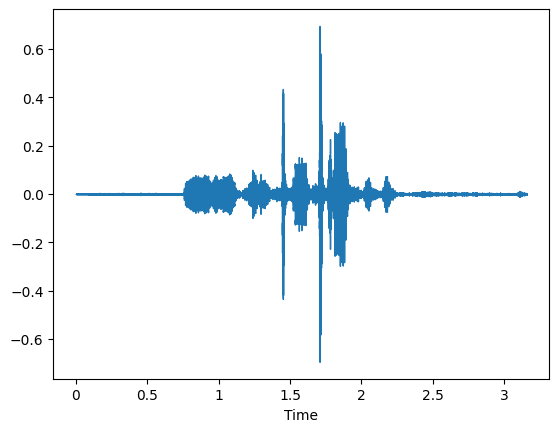

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import soundfile as sf

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

y, sr = librosa.load('/content/Lab1_voice.wav')
librosa.display.waveshow(y)

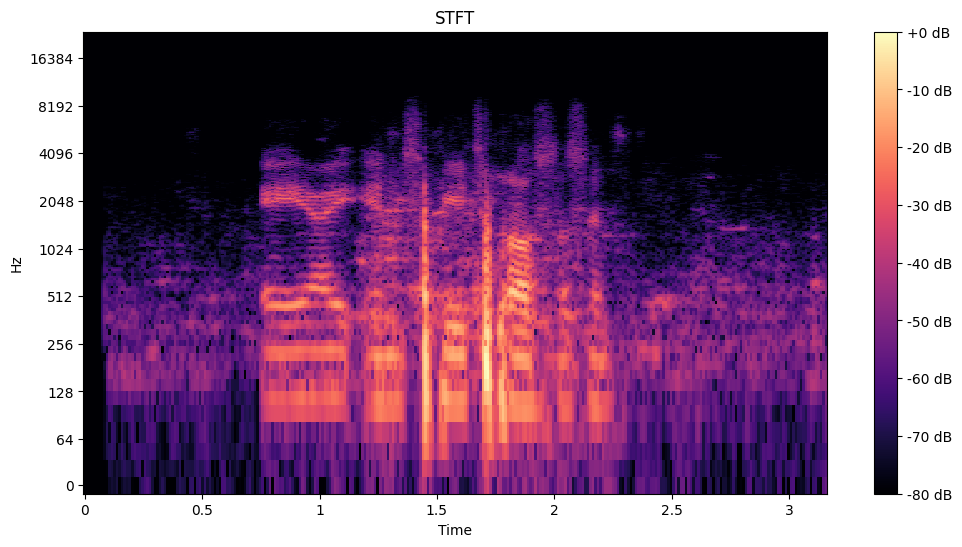

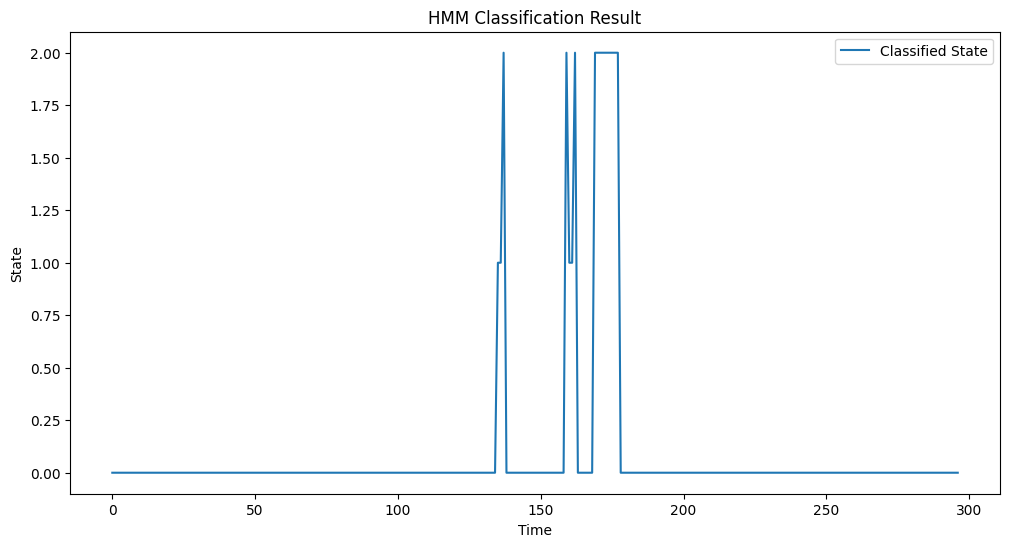

HMM Model Parameters:
Transition Matrix:
[[0.98928571 0.00357143 0.00714286]
 [0.         0.5        0.5       ]
 [0.25       0.08333333 0.66666667]]
Means:
[[1.00099466e-01 1.30245480e-01 2.67868426e-01 ... 2.19473674e-04
  2.11792407e-04 1.94816421e-04]
 [1.33466522e+00 2.42630440e+00 5.13794774e+00 ... 1.96173858e-04
  2.92768738e-04 4.51020111e-04]
 [3.28821435e-01 5.56291080e-01 1.90138259e+00 ... 1.96540971e-04
  1.86714270e-04 1.51877715e-04]]
Covariances:
[[[1.83584363e-02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 3.24807335e-02 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 3.33045065e-01 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  ...
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.56036027e-05
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   3.56010437e-05 0.00000000e+00]
  [0.00000000e+00 0.0

In [11]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from hmmlearn import hmm

def load_audio(file_path):
    ydata, sr = librosa.load(file_path, sr=None)
    return ydata, sr

def stft_features(ydata, sr):
    stft = np.abs(librosa.stft(ydata))
    return stft

def train_hmm(features, n_components=3, n_iter=100):
    model = hmm.GaussianHMM(n_components=n_components, covariance_type="diag", n_iter=n_iter)
    model.fit(features)
    return model

def plot_stft(stft, sr):
    plt.figure(figsize=(12, 6))
    librosa.display.specshow(librosa.amplitude_to_db(stft, ref=np.max), sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('STFT')
    plt.show()

def classify_signal(model, features):
    # Predict using the trained HMM model
    labels = model.predict(features.T)  # Transpose features to fit HMM's requirement
    return labels

def main():
    audio_file_path = r"/content/Lab1_voice.wav"

    y, sr = load_audio(audio_file_path)

    # Extract STFT features
    stft = stft_features(y, sr)

    # Plot STFT
    plot_stft(stft, sr)

    # Train HMM
    model = train_hmm(stft.T)  # Transpose stft to fit HMM's requirement

    # Classify signal using trained HMM
    labels = classify_signal(model, stft)

    # Plot the classification result
    plt.figure(figsize=(12, 6))
    plt.plot(np.arange(len(labels)), labels, label='Classified State')
    plt.xlabel('Time')
    plt.ylabel('State')
    plt.title('HMM Classification Result')
    plt.legend()
    plt.show()

    # Print trained model parameters
    print("HMM Model Parameters:")
    print("Transition Matrix:")
    print(model.transmat_)
    print("Means:")
    print(model.means_)
    print("Covariances:")
    print(model.covars_)

if __name__ == "__main__":
    main()
